# Stationary Calibration

Find out the orientation of the IMU while static using the accelerometer.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
import os

np.set_printoptions(suppress=True)

In [24]:
data_file = csv.reader(open("./recorded_sensor_data/imu_calibration/stationary_logs/imu_data_12_15_13-34-33.csv"))
next(data_file)
next(data_file)

data = []
for row in data_file:
    data.append([float(d) for d in row[:3]])
data = np.array(data)

## Plot the raw data

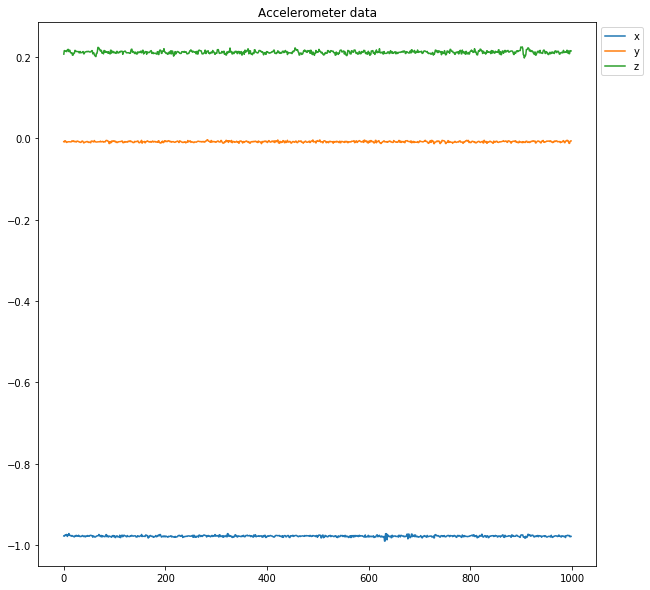

In [25]:
plt.figure(figsize=(10,10))
plt.plot(data[:,0], label='x')
plt.plot(data[:,1], label='y')
plt.plot(data[:,2], label='z')
plt.legend(bbox_to_anchor=(1,1))
plt.title("Accelerometer data")
plt.show()

In [26]:
calib_T = np.array([[1, 2.71075764e-03, 4.55981725e-03],[0, 1, 7.38354478e-04],[0,0,1]])
calib_K = np.array([[9.97279234e-01, 0, 0],[0, 9.96661774e-01, 0],[0, 0, 9.89959950e-01]])
calib_b = np.array([[-6.37606144e-03, -8.99928659e-03, -1.99175409e-02]])

print(data.shape)
calibrated_data = calib_T@calib_K@(data+calib_b).T

(999, 3)


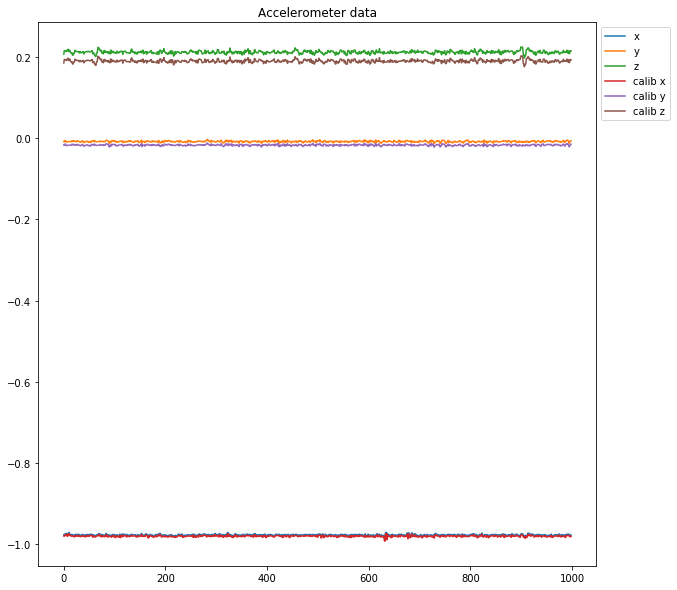

In [27]:
plt.figure(figsize=(10,10))
plt.plot(data[:,0], label='x')
plt.plot(data[:,1], label='y')
plt.plot(data[:,2], label='z')
plt.plot(calibrated_data[0], label='calib x')
plt.plot(calibrated_data[1], label='calib y')
plt.plot(calibrated_data[2], label='calib z')
plt.legend(bbox_to_anchor=(1,1))
plt.title("Accelerometer data")
plt.show()

In [28]:
data = calibrated_data.T

In [29]:
def base_rotation(mean_acc_while_stationary):
    """ https://math.stackexchange.com/questions/180418/calculate-rotation-matrix-to-align-vector-a-to-vector-b-in-3d """
    a = mean_acc_while_stationary
    b = np.array([0, 0, 1])
    v = np.cross(a, b)
    c = np.dot(a, b)
    v_x = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    R = np.eye(3) + v_x + (v_x@v_x)*(1/(1+c))
    return R

In [37]:
means = np.mean(data, axis=0)
normalized_data = data / np.mean(np.linalg.norm(data, axis=1))
means_normalized = means / np.linalg.norm(means)

print("raw means", means)
print("means normalized (use this from now on)", means_normalized)
# print("average norm", np.mean(np.linalg.norm(normalized_data, axis=1)))
print("stdev norm", np.std(data, axis=0))
# print("sum of square errors of norm", np.sum((1 - np.linalg.norm(normalized_data, axis=1))**2))

R = base_rotation(means_normalized)
print("Rotation matrix")
print(R)

print("means rotated", R@means_normalized)

raw means [-0.9809439  -0.01685391  0.1903045 ]
means normalized (use this from now on) [-0.98155718 -0.01686445  0.19042347]
stdev norm [ 0.00186395  0.00163785  0.00347646]
Rotation matrix
[[ 0.19066239 -0.01390549  0.98155718]
 [-0.01390549  0.99976109  0.01686445]
 [-0.98155718 -0.01686445  0.19042347]]
means rotated [ 0.  0.  1.]


In [31]:
# rotate the data using R to see if that makes it (0,0,1)
new_data = (R@normalized_data.T).T
print(new_data.shape)

(999, 3)


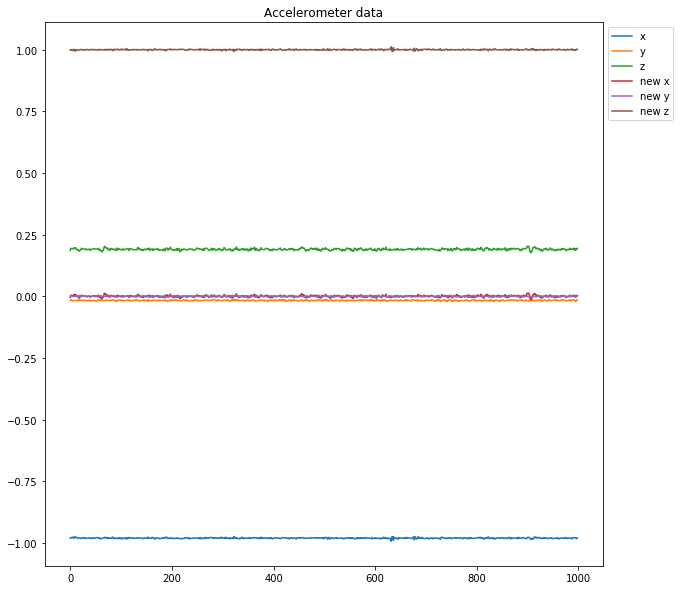

In [32]:
plt.figure(figsize=(10,10))
plt.plot(data[:,0], label='x')
plt.plot(data[:,1], label='y')
plt.plot(data[:,2], label='z')
plt.plot(new_data[:,0], label='new x')
plt.plot(new_data[:,1], label='new y')
plt.plot(new_data[:,2], label='new z')
plt.legend(bbox_to_anchor=(1,1))
plt.title("Accelerometer data")
plt.show()